In [ ]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.93 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kagglesdsdata/competitions/2947/30583/train.7z?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1620498197&Signature=QodB%2F5ktTC3u3apkSaHJxalp%2FeGeykiwylnO3qIOS1bpHLveXqxpIysufEATmNoriTyAiEb4hNoCU4nsNQfb%2FQXQyNZ2%2BULd%2BizjzhzUiFO4RUhgRdcLrY6MedGqhTz9jChDHGRqs0NDQkuOPPFRuAbM2wfaYjtqMcPn67JhDfYpywAa5jNISV2UwJa3LiiCBiY7g1pKKTf%2FjAx3T0TTlNotckzp5NTEB8eNXsJnNIf6hir4OgSQUZ4rU5qVd3rC2rtCOUvvlxVH2AAE6HdVs0Rsj6RtMbiaoQIApikW6tot9W8T%2BoZo925cG64SUbkakZrDGUGCfL8lfznFrlK4hA%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.7z" -c -O 'train.7z'

--2021-05-05 18:24:12--  https://storage.googleapis.com/kagglesdsdata/competitions/2947/30583/train.7z?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1620498197&Signature=QodB%2F5ktTC3u3apkSaHJxalp%2FeGeykiwylnO3qIOS1bpHLveXqxpIysufEATmNoriTyAiEb4hNoCU4nsNQfb%2FQXQyNZ2%2BULd%2BizjzhzUiFO4RUhgRdcLrY6MedGqhTz9jChDHGRqs0NDQkuOPPFRuAbM2wfaYjtqMcPn67JhDfYpywAa5jNISV2UwJa3LiiCBiY7g1pKKTf%2FjAx3T0TTlNotckzp5NTEB8eNXsJnNIf6hir4OgSQUZ4rU5qVd3rC2rtCOUvvlxVH2AAE6HdVs0Rsj6RtMbiaoQIApikW6tot9W8T%2BoZo925cG64SUbkakZrDGUGCfL8lfznFrlK4hA%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.7z
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 173.194.210.128, 173.194.213.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33622980 (32M) [application/x-7z-compressed]
Saving to: ‘train.7z’

train.7z            100%[===================>]

In [ ]:
pip install py7zr

     |████████████████████████████████| 65 kB 2.3 MB/s eta 0:00:011
     |████████████████████████████████| 2.2 MB 5.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.9 MB 30.7 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 52.8 MB/s eta 0:00:01
     |████████████████████████████████| 357 kB 48.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import py7zr
def unzip(filename):
    a=py7zr.SevenZipFile(filename,mode='r')
    py7zr.SevenZipFile.extractall(a)
    print("Successfully Unzipped {}".format(filename))

In [ ]:
unzip('train.7z')

Successfully Unzipped train.7z


In [ ]:
pip install tables

     |████████████████████████████████| 4.3 MB 4.8 MB/s eta 0:00:01     |████████████████████████████████| 4.3 MB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 471 kB 37.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


###Importing Requisite Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import os
import csv
import math
import pickle
import random
import pandas as pd
import numpy as np
import seaborn as sns
import networkx as nx
from pandas import read_hdf
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from pandas import HDFStore,DataFrame
from scipy.sparse.linalg import svds, eigs
from sklearn.metrics import confusion_matrix
from scipy.stats import randint as sp_randint
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
dir= os.getcwd()
print(dir)

/home/satya_anuragh


In [ ]:
g=nx.read_edgelist(os.path.join(dir,'train_woheader.csv'),delimiter=',',create_using=nx.DiGraph(),nodetype=int)
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 1862220
Number of edges: 9437519
Average in degree:   5.0679
Average out degree:   5.0679


##Exploratory Data Analysis

In [ ]:
print("The number of unique Persons: {}".format(len(g.nodes())))

The number of unique Persons: 1862220


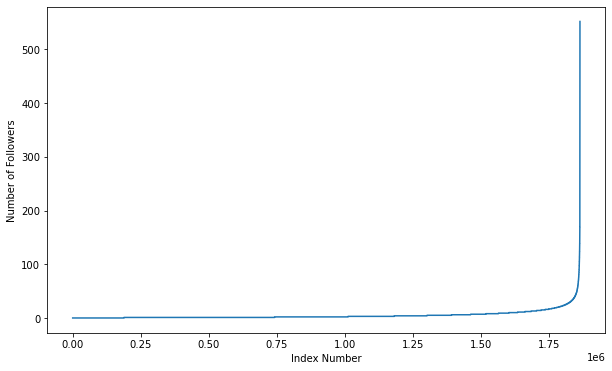

In [ ]:
indegree_list= list(dict(g.in_degree()).values())
indegree_list.sort()
plt.figure(figsize=(10,6))
plt.plot(indegree_list)
plt.xlabel("Index Number")
plt.ylabel("Number of Followers")
plt.show()

In [ ]:
len(indegree_list)

1862222

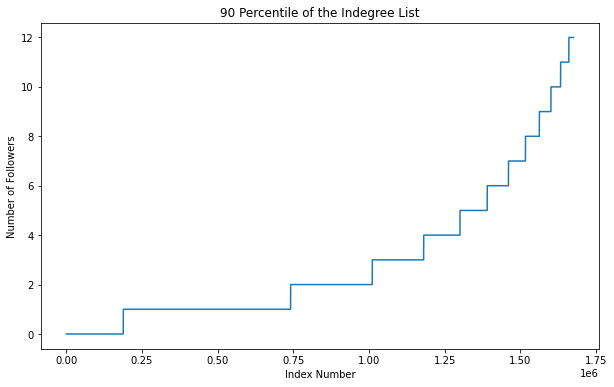

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(indegree_list[:int(0.9*len(indegree_list))])
plt.xlabel("Index Number")
plt.ylabel("Number of Followers")
plt.title("90 Percentile of the Indegree List")
plt.show()

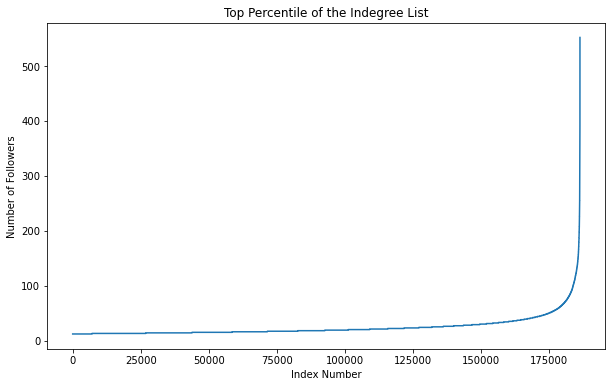

In [ ]:
plt.figure(figsize=(10,6))
x=indegree_list[int(0.9*len(indegree_list)):]
plt.plot(x)
plt.xlabel("Index Number")
plt.ylabel("Number of Followers")
plt.title("Top Percentile of the Indegree List")
plt.show()

In [ ]:
for i in range(11):
    print(90+i,"Percentile of the list: {}".format(np.percentile(indegree_list,90+i)))

90 Percentile of the list: 12.0
91 Percentile of the list: 13.0
92 Percentile of the list: 14.0
93 Percentile of the list: 15.0
94 Percentile of the list: 17.0
95 Percentile of the list: 19.0
96 Percentile of the list: 21.0
97 Percentile of the list: 24.0
98 Percentile of the list: 29.0
99 Percentile of the list: 40.0
100 Percentile of the list: 552.0


In [ ]:
for i in range(10,110,10):
    print(99+(i/100),"Percentile of the list: {}".format(np.percentile(indegree_list,99+(i/100))))

99.1 Percentile of the list: 42.0
99.2 Percentile of the list: 44.0
99.3 Percentile of the list: 47.0
99.4 Percentile of the list: 50.0
99.5 Percentile of the list: 55.0
99.6 Percentile of the list: 61.0
99.7 Percentile of the list: 70.0
99.8 Percentile of the list: 84.0
99.9 Percentile of the list: 112.0
100.0 Percentile of the list: 552.0


<function matplotlib.pyplot.show(close=None, block=None)>

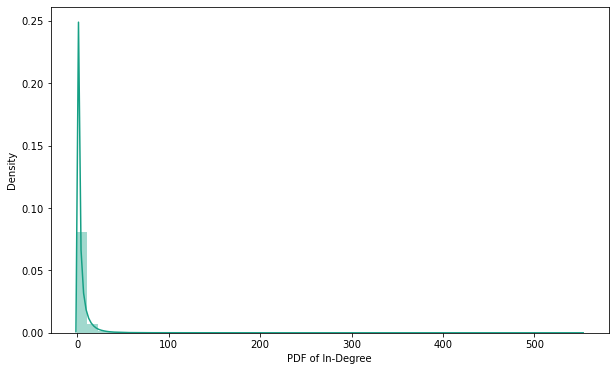

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(indegree_list,color='#16A085')
plt.xlabel('PDF of In-Degree')
plt.show

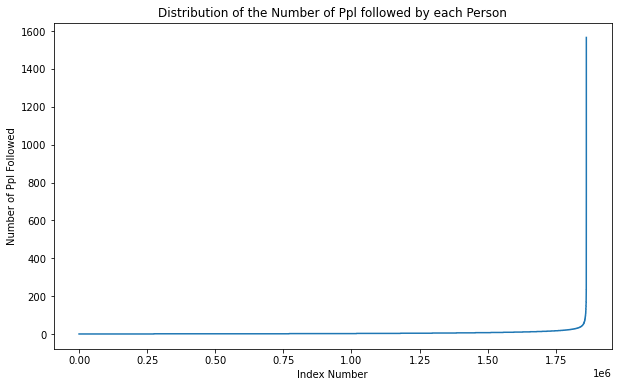

In [ ]:
outdegree_list= list(dict(g.out_degree).values())
outdegree_list.sort()
plt.figure(figsize=(10,6))
plt.plot(outdegree_list)
plt.xlabel("Index Number")
plt.ylabel("Number of Ppl Followed")
plt.title("Distribution of the Number of Ppl followed by each Person")
plt.show()

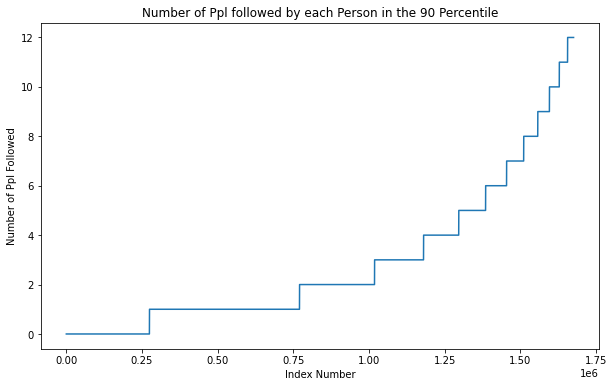

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(outdegree_list[:int(0.9*len(outdegree_list))])
plt.xlabel("Index Number")
plt.ylabel("Number of Ppl Followed")
plt.title("Number of Ppl followed by each Person in the 90 Percentile")
plt.show()

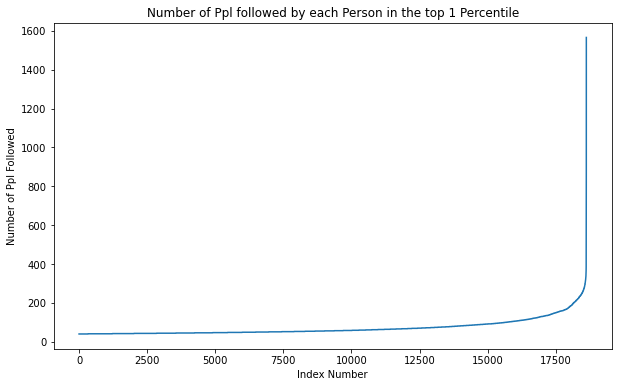

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(outdegree_list[int(0.99*len(outdegree_list)):])
plt.xlabel("Index Number")
plt.ylabel("Number of Ppl Followed")
plt.title("Number of Ppl followed by each Person in the top 1 Percentile")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

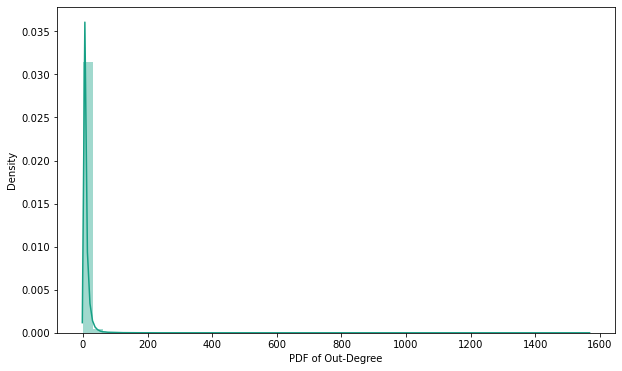

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(outdegree_list,color='#16A085')
plt.xlabel('PDF of Out-Degree')
plt.show

In [ ]:
n1=0
for i in range(len(indegree_list)):
    if indegree_list[i]==0:
        n1=n1+1
print("Number of people with zero followers:{} and the percentage is {}".format(n1,(n1/len(indegree_list))*100))

Number of people with zero followers:188044 and the percentage is 10.09782936728274


In [ ]:
n2=0
for i in range(len(outdegree_list)):
    if outdegree_list[i]==0:
        n2=n2+1
print("Number of people who do not follow:{} and the percentage is {}".format(n2,(n2/len(outdegree_list))*100))

Number of people who do not follow:274513 and the percentage is 14.741153310400158


In [ ]:
a= g.nodes()
a=list(a)
print(len(a))
print(type(a))

1862222
<class 'list'>


In [ ]:
n=0
for j in g.nodes():
    if len(list(g.predecessors(j)))==0 and len(list(g.successors(j)))==0:
        n=n+1
print("Number of People with both zero followers and do not follow any one {}".format(n))

Number of People with both zero followers and do not follow any one 0


In [ ]:
from collections import Counter
dict_in= dict(g.in_degree())
dict_out= dict(g.out_degree())
d= Counter(dict_in)+Counter(dict_out)
in_out_degree= np.array(list(d.values()))

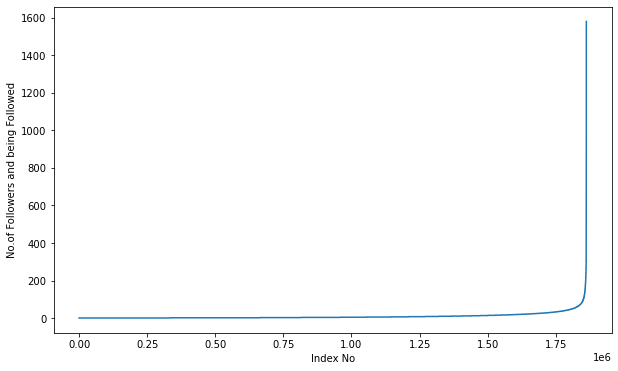

In [ ]:
in_out_degree_sort= sorted(in_out_degree)
plt.figure(figsize=(10,6))
plt.plot(in_out_degree_sort)
plt.xlabel("Index No")
plt.ylabel("No.of Followers and being Followed")
plt.show()

In [ ]:
minimum= min(in_out_degree)
maximum= max(in_out_degree)
print("Minimun number of followers and followed:{}".format(minimum))
print("Maximun number of followers and followed:{}".format(maximum))

m1=0
m2=0
for i in in_out_degree:
    if i== minimum:
        m1=m1+1
    if i== maximum:
        m2=m2+1
print("Number of users with minimum number of Followers or being followed:{}".format(m1))
print("Number of users with maximum number of Followers or being followed:{}".format(m2))

Minimun number of followers and followed:1
Maximun number of followers and followed:1579
Number of users with minimum number of Followers or being followed:334293
Number of users with maximum number of Followers or being followed:1


In [ ]:
weak_comp= list(nx.weakly_connected_components(g))
print(len(weak_comp))

45559


In [ ]:
count=0
for w in weak_comp:
    if len(w)==2:
        count=count+1
print(count)

32196


In [ ]:
r = csv.reader(open('/home/satya_anuragh/train_woheader.csv','r'))
print(type(r))

<class '_csv.reader'>


 ## Generating some edges which are not present in graph for supervised learning

In [ ]:
%%time
###generating bad edges from given graph
import random
r = csv.reader(open('/home/satya_anuragh/train_woheader.csv','r'))
edges = dict()
for edge in r:
    edges[(edge[0], edge[1])] = 1
        
        
missing_edges = set([])
while (len(missing_edges)<9437519):
    a=random.randint(1, 1862220)
    b=random.randint(1, 1862220)
    tmp = edges.get((a,b),-1)
    if tmp == -1 and a!=b:
        try:
            if nx.shortest_path_length(g,source=a,target=b) > 2: 
                missing_edges.add((a,b))
            else:
                continue  
        except:  
            missing_edges.add((a,b))              
    else:
        continue
pickle.dump(missing_edges,open('/home/satya_anuragh/missing_edges_final.p','wb'))

CPU times: user 1min 28s, sys: 1.97 s, total: 1min 30s
Wall time: 1min 31s


In [ ]:
with open('/home/satya_anuragh/missing_edges_final.p','rb') as me:
    missing_edges= pickle.load(me) 

## Training and Test data split:

In [ ]:
df_pos= pd.read_csv('/home/satya_anuragh/train_pos_after_eda.csv')
df_neg= pd.DataFrame(list(missing_edges),columns= ["source_node","destination_node"])

print("Number of Nodes with edges= {}".format(df_pos.shape[0]))
print("Number of Nodes without edges= {}".format(df_neg.shape[0]))
print("=="*60)

train_x_pos,test_x_pos,train_y_pos,test_y_pos= train_test_split(df_pos,np.ones(len(df_pos)),test_size=0.2,random_state=20)
train_x_neg,test_x_neg,train_y_neg,test_y_neg= train_test_split(df_neg,np.ones(len(df_neg)),test_size=0.2,random_state=20)

print("Number of Nodes in the Train Data graph with edges,Train_x:",train_x_pos.shape[0],"Train_y:",train_y_pos.shape[0])
print("Number of Nodes in the Test Data graph with edges,Test_x:",test_x_pos.shape[0],"Test_y:",test_y_pos.shape[0])
print("=="*60)

print("Number of Nodes in the Train Data graph without edges,Train_x:",train_x_neg.shape[0],"Train_y:",train_y_neg.shape[0])
print("Number of Nodes in the Test Data graph without edges,Test_x:",test_x_neg.shape[0],"Test_y:",test_y_neg.shape[0])

train_x_pos.to_csv('/home/satya_anuragh/train_x_pos.csv',header=False, index=False)
train_y_pos.to_csv('/home/satya_anuragh/train_y_pos.csv',header=False, index=False)
train_x_neg.to_csv('/home/satya_anuragh/train_x_neg.csv',header=False, index=False)
train_y_neg.to_csv('/home/satya_anuragh/train_y_neg.csv',header=False, index=False)

test_x_pos.to_csv('/home/satya_anuragh/test_x_pos.csv',header=False, index=False)
test_y_pos.to_csv('/home/satya_anuragh/test_y_pos.csv',header=False, index=False)
test_x_neg.to_csv('/home/satya_anuragh/test_x_neg.csv',header=False, index=False)
test_y_neg.to_csv('/home/satya_anuragh/test_y_neg.csv',header=False, index=False)

Number of Nodes with edges= 7550014
Number of Nodes without edges= 9437519
Number of Nodes in the Train Data graph with edges,Train_x: 6040011 Train_y: 6040011
Number of Nodes in the Test Data graph with edges,Test_x: 1510003 Test_y: 1510003
Number of Nodes in the Train Data graph without edges,Train_x: 7550015 Train_y: 7550015
Number of Nodes in the Test Data graph without edges,Test_x: 1887504 Test_y: 1887504


In [ ]:
train_graph= nx.read_edgelist('/home/satya_anuragh/train_x_pos.csv',delimiter=',',create_using= nx.DiGraph(),nodetype=int)
test_graph= nx.read_edgelist('/home/satya_anuragh/test_x_pos.csv',delimiter=',',create_using= nx.DiGraph(),nodetype=int)

print(nx.info(train_graph))
print(nx.info(test_graph))

train_nodes_pos= set(train_graph.nodes())
test_nodes_pos= set(test_graph.nodes())

tr_te_com= len(train_nodes_pos.intersection(test_nodes_pos))
tr_in_te_out= len(train_nodes_pos-test_nodes_pos)
tr_out_te_in= len(test_nodes_pos-train_nodes_pos)

print("Number of Nodes common between train and test nodes with edges:",tr_te_com)
print("Number of Nodes in train but not in test:",tr_in_te_out)
print("Number of Nodes in train but not in test:",tr_out_te_in)
print("Percentage of the nodes present in Test Data but not present in the Train Data:",(tr_out_te_in/len(test_nodes_pos))*100)

Name: 
Type: DiGraph
Number of nodes: 1688500
Number of edges: 6040011
Average in degree:   3.5771
Average out degree:   3.5771
Name: 
Type: DiGraph
Number of nodes: 1039661
Number of edges: 1510003
Average in degree:   1.4524
Average out degree:   1.4524
Number of Nodes common between train and test nodes with edges: 947439
Number of Nodes in train but not in test: 741061
Number of Nodes in train but not in test: 92222
Percentage of the nodes present in Test Data but not present in the Train Data: 8.870391406429595


In [ ]:
train_x_pos= pd.read_csv('/home/satya_anuragh/train_x_pos.csv', names=["source_nodes","destination_nodes"])
test_x_pos= pd.read_csv('/home/satya_anuragh/test_x_pos.csv', names=["source_nodes","destination_nodes"])
train_x_neg= pd.read_csv('/home/satya_anuragh/train_x_neg.csv', names=["source_nodes","destination_nodes"])
test_x_neg= pd.read_csv('/home/satya_anuragh/test_x_neg.csv', names=["source_nodes","destination_nodes"])

train_y_pos= np.ones(train_x_pos.shape[0])
train_y_neg= np.zeros(train_x_neg.shape[0])
test_y_pos= np.ones(test_x_pos.shape[0])
test_y_neg= np.zeros(test_x_neg.shape[0])


print("=="*60)
print("Number of nodes in the Train Dataset with Edges:",train_x_pos.shape[0])
print("Number of nodes in the Train Dataset without Edges:",train_x_neg.shape[0])
print("Number of nodes in the Test Dataset with Edges:",test_x_pos.shape[0])
print("NUmber of nodes in the Test Dataset without Edges:",test_x_neg.shape[0])

print("=="*60)

train_x= train_x_pos.append(train_x_neg, ignore_index=True)
train_y= np.concatenate((train_y_pos,train_y_neg))
test_x= test_x_pos.append(test_x_neg, ignore_index=True)
test_y= np.concatenate((test_y_pos,test_y_neg))

train_x.to_csv('/home/satya_anuragh/train_x.csv',header=False, index=False)
pd.DataFrame(train_y.astype(int)).to_csv('/home/satya_anuragh/train_y.csv',header=False, index=False)
test_x.to_csv('/home/satya_anuragh/test_x.csv',header=False, index=False)
pd.DataFrame(test_y.astype(int)).to_csv('/home/satya_anuragh/test_y.csv',header=False, index=False)

Number of nodes in the Train Dataset with Edges: 6040011
Number of nodes in the Train Dataset without Edges: 7550015
Number of nodes in the Test Dataset with Edges: 1510003
NUmber of nodes in the Test Dataset without Edges: 1887504


In [ ]:
print("Dimensions of Train_x dataset",train_x.shape)
print("Dimensions of Train_y dataset",train_y.shape)
print("Dimensions of Test_x dataset",test_x.shape)
print("Dimensions of Test_y dataset",test_y.shape)

Dimensions of Train_x dataset (15100030, 2)
Dimensions of Train_y dataset (15100030,)
Dimensions of Test_x dataset (3775008, 2)
Dimensions of Test_y dataset (3775008,)


## Featurization

In [ ]:
train_graph=nx.read_edgelist('/home/satya_anuragh/train_x.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
print(nx.info(train_graph))

Name: 
Type: DiGraph
Number of nodes: 1862167
Number of edges: 13590013
Average in degree:   7.2980
Average out degree:   7.2980


## Similarity Measures

## Jaccard Similarity Measures for Followers and Followees

In [ ]:
def jaccard_for_followers(a,b):
    try:
        if len(set(train_graph.predecessors(a)))==0 and len(set(train_graph.predecessors(b)))==0:
            sim=0
        else:
            sim= len(set(train_graph.predecessors(a)).intersection(set(train_graph.predecessors(b))))/ len(set(set(train_graph.predecessors(a)).union(set(train_graph.predecessors(b)))))
    except:
        return 0
    
    return sim

In [ ]:
def jaccard_for_followees(a,b):
    try:
        if len(set(train_graph.successors(a)))==0 and len(set(train_graph.successors(b)))==0:
            sim=0
        else:
            sim= len(set(train_graph.successors(a)).intersection(set(train_graph.successors(b))))/ len(set(set(train_graph.successors(a)).union(set(train_graph.successors(b)))))
    except:
        return 0
    
    return sim

## Cosine Similarity Measures for Followers and Followees

In [ ]:
def cosine_for_followers(a,b):
    try:
        if len(set(train_graph.predecessors(a)))==0 and len(set(train_graph.predecessors(b)))==0:
            sim=0
        else:
            sim= len(set(train_graph.predecessors(a)).intersection(set(train_graph.predecessors(b))))/sqrt(len(set(train_graph.predecessors(a)))*len(set(train_graph.predecessors(b))))
    except:
        return 0
    
    return sim

In [ ]:
def cosine_for_followees(a,b):
    try:
        if len(set(train_graph.successors(a)))==0 and len(set(train_graph.successors(b)))==0:
            sim=0
        else:
            sim= len(set(train_graph.successors(a)).intersection(set(train_graph.successors(b))))/sqrt(len(set(train_graph.successors(a)))*len(set(train_graph.successors(b))))
    except:
        return 0

    return sim

## Ranking Measures

## Page Rank Measures

In [ ]:
def page_rank(a):
    pr= nx.pagerank(train_graph,alpha=0.85)
    return pr

##Graph Measures

### Shortest Path Measure

In [ ]:
def shortest_path(a,b):
    if train_graph.has_edge(a,b):
        train_graph.remove_edge(a,b)
        p= nx.shortest_path_length(train_grpah,source=a,target=b)
        train_graph.add_edge(a,b)
    else:
        p= nx.shortest_path_length(train_graph,source=a,target=b)
    return p

In [ ]:
#if has direct edge then deleting that edge and calculating shortest path
def compute_shortest_path_length(a,b):
    p=-1
    try:
        if train_graph.has_edge(a,b):
            train_graph.remove_edge(a,b)
            p= nx.shortest_path_length(train_graph,source=a,target=b)
            train_graph.add_edge(a,b)
        else:
            p= nx.shortest_path_length(train_graph,source=a,target=b)
        return p
    except:
        return -1

## Same Community Measure

In [ ]:
def belongs_to_same_wcc(a,b):
    wcc=list(nx.weakly_connected_components(train_graph))
    index = []
    if train_graph.has_edge(b,a):
        return 1
    if train_graph.has_edge(a,b):
            for i in wcc:
                if a in i:
                    index= i
                    break
            if (b in index):
                train_graph.remove_edge(a,b)
                if compute_shortest_path_length(a,b)==-1:
                    train_graph.add_edge(a,b)
                    return 0
                else:
                    train_graph.add_edge(a,b)
                    return 1
            else:
                return 0
    else:
            for i in wcc:
                if a in i:
                    index= i
                    break
            if(b in index):
                return 1
            else:
                return 0

## Adamic/Adar Index

In [ ]:
def adar_index(a,b):
    sum=0
    try:
        N= list(set(train_graph.successors(a)).intersection(set(train_graph.successors(b))))
        
        if len(N)!=0:
            for n in N:
                sum= sum+(1/np.log10(len(list(train_graph.predecessors(n)))))
            return sum
        else:
            return 0
    
    except:
        return 0

### Is the person Following Back Measure

In [ ]:
def follows_back(a,b):
    if train_graph.has_edge(b,a):
        return 1
    else:
        return 0

### Katz Similarity

In [ ]:
def katz_centrality(graph):
    katz= nx.katz.katz_centrality(graph,alpha=0.005,beta=1)
    return katz

### HITS Score

In [ ]:
def hits_score(graph):
    hits= nx.hits(graph,max_iter=100,tol=1e-08,nstart=None,normalized=True)
    return hits

###  Reading a sample of Data from both train and test

In [ ]:
filename= '/home/satya_anuragh/train_x.csv'

n_train=0
for line in open(filename):
    n_train=n_train+1
print("Total number of nodes in the Train Dataset",n_train)

s=100000

skip_train= sorted(random.sample(range(1,n_train+1),n_train-s))
print("Number of rows skippied from the Train dataset:",len(skip_train))

Total number of nodes in the Train Dataset 13590026
Number of rows skippied from the Train dataset: 13490026


In [ ]:
train_df_fin= pd.read_csv('/home/satya_anuragh/train_x.csv', skiprows=skip_train,names=['source_node','destination_node'])
print("The shape of the New Train Dataset:",train_df_fin.shape)
train_df_fin['indicator_link']= pd.read_csv('/home/satya_anuragh/train_y.csv',skiprows=skip_train,names=['indicator_link'])
print(train_df_fin.head())

The shape of the New Train Dataset: (100001, 2)
   source_node  destination_node  indicator_link
0      1209596            914101               1
1      1297299            944694               1
2       900647            790873               1
3      1609958           1258903               1
4      1288200            621303               1


In [ ]:
filename= '/home/satya_anuragh/test_x.csv'

n_test=0
for line in open(filename):
    n_test= n_test+1
print("Total number of nodes in the Test Dataset",n_test)

s= 50000

skip_test= sorted((random.sample(range(1,n_test+1),n_test-s)))

print("Number of rows skipped from the Test Dataset:",len(skip_test))

Total number of nodes in the Test Dataset 3397507
Number of rows skipped from the Test Dataset: 3347507


In [ ]:
test_df_fin= pd.read_csv('/home/satya_anuragh/test_x.csv', skiprows= skip_test,names=['source_node','destination_node'])
print("The shape of the New Test Dataset:",test_df_fin.shape)
test_df_fin['indicator_link']= pd.read_csv('/home/satya_anuragh/test_y.csv',skiprows=skip_test,names=['indocator_link'])
print(test_df_fin.head(2))

The shape of the New Test Dataset: (50001, 2)
   source_node  destination_node  indicator_link
0      1806020           1333352               1
1       241858            308816               1


##Adding new set of features

In [ ]:
train_df_fin['jaccard_followers']= train_df_fin.apply(lambda row:jaccard_for_followers(row['source_node'],row['destination_node']),axis=1)
test_df_fin['jaccard_followers']= test_df_fin.apply(lambda row:jaccard_for_followers(row['source_node'],row['destination_node']),axis=1)

train_df_fin['jaccard_followees']= train_df_fin.apply(lambda row:jaccard_for_followees(row['source_node'],row['destination_node']),axis=1)
test_df_fin['jaccard_followees']= test_df_fin.apply(lambda row:jaccard_for_followees(row['source_node'],row['destination_node']),axis=1)

train_df_fin['cosine_followers']= train_df_fin.apply(lambda row:cosine_for_followers(row['source_node'],row['destination_node']),axis=1)
test_df_fin['cosine_followers']= test_df_fin.apply(lambda row:cosine_for_followers(row['source_node'],row['destination_node']),axis=1)

train_df_fin['cosine_followees']= train_df_fin.apply(lambda row:cosine_for_followees(row['source_node'],row['destination_node']),axis=1)
test_df_fin['cosine_followees']= test_df_fin.apply(lambda row:cosine_for_followees(row['source_node'],row['destination_node']),axis=1)

In [ ]:
def compute_features_stage1(df_final):
    calculating no of followers followees for source and destination
    calculating intersection of followers and followees for source and destination
    num_followers_s=[]
    num_followees_s=[]
    num_followers_d=[]
    num_followees_d=[]
    inter_followers=[]
    inter_followees=[]
    for i,row in df_final.iterrows():
        try:
            s1=set(train_graph.predecessors(row['source_node']))
            s2=set(train_graph.successors(row['source_node']))
        except:
            s1 = set()
            s2 = set()
        try:
            d1=set(train_graph.predecessors(row['destination_node']))
            d2=set(train_graph.successors(row['destination_node']))
        except:
            d1 = set()
            d2 = set()
        num_followers_s.append(len(s1))
        num_followees_s.append(len(s2))

        num_followers_d.append(len(d1))
        num_followees_d.append(len(d2))

        inter_followers.append(len(s1.intersection(d1)))
        inter_followees.append(len(s2.intersection(d2)))
    
    return num_followers_s, num_followers_d, num_followees_s, num_followees_d, inter_followers, inter_followees
    return num_followers_d


In [ ]:
train_df_fin['num_followers_d']= compute_features_stage1(train_df_fin)

test_df_fin['num_followers_d']= compute_features_stage1(test_df_fin)

In [ ]:
train_df_fin['s_followers'],train_df_fin['d_followers'], \
train_df_fin['s_followees'],train_df_fin['d_followees'], \
train_df_fin['inter_followers'],train_df_fin['inter_followees']= compute_features_stage1(train_df_fin)

test_df_fin['s_followers'],test_df_fin['d_followers'], \
test_df_fin['s_followees'],test_df_fin['s_followees'], \
test_df_fin['inter_followers'],test_df_fin['inter_followees']= compute_features_stage1(test_df_fin)

hdf= HDFStore('storage_sample_stage1.h5')
hdf.put('train_df',train_df_fin, format='table', data_columns=True)
hdf.put('test_df',test_df_fin, format='table', data_columns=True)
hdf.close()

In [ ]:
train_df_fin= read_hdf('/home/satya_anuragh/storage_sample_stage1.h5', 'train_df',mode='r')
test_df_fin= read_hdf('/home/satya_anuragh/storage_sample_stage1.h5', 'test_df',mode='r')

In [ ]:
train_df_fin['adar_index']= train_df_fin.apply(lambda row: adar_index(row['source_node'], row['destination_node']),axis=1)
test_df_fin['adar_index']= test_df_fin.apply(lambda row: adar_index(row['source_node'],row['destination_node']),axis=1)

train_df_fin['follows_back']= train_df_fin.apply(lambda row: follows_back(row['source_node'],row['destination_node']),axis=1)
test_df_fin['follows_back']= test_df_fin.apply(lambda row: follows_back(row['source_node'],row['destination_node']),axis=1)

train_df_fin['same_comp']= train_df_fin.apply(lambda row: belongs_to_same_wcc(row['source_node'],row['destination_node']),axis=1)
test_df_fin['same_comp']= test_df_fin.apply(lambda row: belongs_to_same_wcc(row['source_node'],row['destination_node']),axis=1)

train_df_fin['shortest_path']= train_df_fin.apply(lambda row: shortest_path(row['source_node'],row['destination_node']),axis=1)
test_df_fin['shortest_path']= test_df_fin.apply(lambda row: shortest_path(row['source_node'],row['destination_node']),axis=1)

KeyboardInterrupt: 

In [ ]:
hdf= HDFStore('storage_sample_stage1.h5')
hdf.put('train_df',train_df_fin, format='table', data_columns=True)
hdf.put('test_df',test_df_fin, format='table', data_columns=True)
hdf.close()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,s_followees,s_followers,d_followees,d_followers,inter_followees,inter_followers,adar_index,follows_back
0,1209596,914101,1,0.0,0.0,0,0,3,3,2,2,0,0,0.0,0
1,1297299,944694,1,0.0,0.0,0,0,9,10,3,5,0,0,0.0,0


In [ ]:
train_df_fin= read_hdf('/home/satya_anuragh/storage_sample_stage1.h5', 'train_df',mode='r')
test_df_fin= read_hdf('/home/satya_anuragh/storage_sample_stage1.h5', 'test_df',mode='r')

4032

In [ ]:
weight_in={}
weight_out={}

for i in tqdm(train_graph.nodes()):
    s1=set(train_graph.predecessors(i))
    w1= 1.0/sqrt(1+len(s1))
    weight_in[i]= w1
    
    s2= set(train_graph.successors(i))
    w2= 1.0/sqrt(1+len(s2))
    weight_out[i]= w2

mean_weight_in= np.mean(list(weight_in.values()))
mean_weight_out= np.mean(list(weight_out.values()))


In [ ]:
train_df_fin['weight_in'] = train_df_fin.destination_node.apply(lambda x: Weight_in.get(x,mean_weight_in))
train_df_fin['weight_out'] = train_df_fin.source_node.apply(lambda x: Weight_out.get(x,mean_weight_out))

test_df_fin['weight_in'] = test_df_fin.destination_node.apply(lambda x: Weight_in.get(x,mean_weight_in))
test_df_fin['weight_out'] = test_df_fin.source_node.apply(lambda x: Weight_out.get(x,mean_weight_out))

train_df_fin['weight_f1'] = train_df_fin.weight_in + train_df_fin.weight_out
train_df_fin['weight_f2'] = train_df_fin.weight_in * train_df_fin.weight_out
train_df_fin['weight_f3'] = (2*train_df_fin.weight_in + 1*train_df_fin.weight_out)
train_df_fin['weight_f4'] = (1*train_df_fin.weight_in + 2*train_df_fin.weight_out)

test_df_fin['weight_f1'] = test_df_fin.weight_in + test_df_fin.weight_out
test_df_fin['weight_f2'] = test_df_fin.weight_in * test_df_fin.weight_out
test_df_fin['weight_f3'] = (2*test_df_fin.weight_in + 1*test_df_fin.weight_out)
test_df_fin['weight_f4'] = (1*test_df_fin.weight_in + 2*test_df_fin.weight_out)

In [ ]:
train_df_fin['page_rank_s'] = train_df_fin.source_node.apply(lambda x:pr.get(x,mean_pr))
train_df_fin['page_rank_d'] = train_df_fin.destination_node.apply(lambda x:pr.get(x,mean_pr))

test_df_fin['page_rank_s'] = test_df_fin.source_node.apply(lambda x:pr.get(x,mean_pr))
test_df_fin['page_rank_d'] = test_df_fin.destination_node.apply(lambda x:pr.get(x,mean_pr))
    
train_df_fin['katz_s'] = train_df_fin.source_node.apply(lambda x: katz.get(x,mean_katz))
train_df_fin['katz_d'] = train_df_fin.destination_node.apply(lambda x: katz.get(x,mean_katz))

df_final_test['katz_s'] = df_final_test.source_node.apply(lambda x: katz.get(x,mean_katz))
df_final_test['katz_d'] = df_final_test.destination_node.apply(lambda x: katz.get(x,mean_katz))
    
train_df_fin['hubs_s'] = train_df_fin.source_node.apply(lambda x: hits[0].get(x,0))
train_df_fin['hubs_d'] = train_df_fin.destination_node.apply(lambda x: hits[0].get(x,0))

test_df_fin['hubs_s'] = test_df_fin.source_node.apply(lambda x: hits[0].get(x,0))
test_df_fin['hubs_d'] = test_df_fin.destination_node.apply(lambda x: hits[0].get(x,0))
    
test_df_fin['authorities_s'] = test_df_fin.source_node.apply(lambda x: hits[1].get(x,0))
test_df_fin['authorities_d'] = test_df_fin.destination_node.apply(lambda x: hits[1].get(x,0))

test_df_fin['authorities_s'] = test_df_fin.source_node.apply(lambda x: hits[1].get(x,0))
test_df_fin['authorities_d'] = test_df_fin.destination_node.apply(lambda x: hits[1].get(x,0))

hdf = HDFStore('/home/satya_anuragh/storage_sample_stage3.h5')
hdf.put('train_df',df_final_train, format='table', data_columns=True)
hdf.put('test_df',df_final_test, format='table', data_columns=True)
hdf.close()

In [ ]:
train_df_fin = read_hdf('/home/satya_anuragh/storage_sample_stage3.h5', 'train_df',mode='r')
test_df_fin = read_hdf('/home/satya_anuragh/storage_sample_stage3.h5', 'test_df',mode='r')

In [ ]:
train_df_fin.head(2)

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,...,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d
0,273084,1505602,1,0,0.000000,0.000000,0.000000,6,15,8,...,1.005929,0.877964,2.045290e-06,3.459963e-07,0.000773,0.000756,1.943132e-13,1.941103e-13,9.226339e-16,2.231877e-15
1,832016,1543415,1,0,0.187135,0.028382,0.343828,94,61,142,...,0.332196,0.356598,2.353458e-07,6.427660e-07,0.000845,0.001317,3.906648e-11,9.424102e-11,1.208074e-11,1.273080e-10


## Creating an Adjacency Matrix and breaking into SVD Components

In [ ]:
sadj_col= sorted(train_graph.nodes())
sadj_dict={}
for idx,val in enumerate(sadj_col):
    sadj_dict[val]=idx

In [ ]:
def svd(x, S):
    try:
        z = sadj_dict[x]
        return S[z]
    except:
        return [0,0,0,0,0,0]

In [ ]:
Adj = nx.adjacency_matrix(train_graph,nodelist=sorted(train_graph.nodes())).asfptype()

In [ ]:
U, s, V = svds(Adj, k = 6)
print('Adjacency matrix Shape',Adj.shape)
print('U Shape',U.shape)
print('V Shape',V.shape)
print('s Shape',s.shape)

Adjacency matrix Shape (1862167, 1862167)
U Shape (1862167, 6)
V Shape (6, 1862167)
s Shape (6,)


In [ ]:
#source:https://github.com/Raman-Raje/Facebook-Friend-Recommendation-using-Graph-Mining/blob/master/raman.shinde15@gmail.com_23.ipynb
train_df_fin[['svd_u_s_1', 'svd_u_s_2','svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5', 'svd_u_s_6']] = \
train_df_fin.source_node.apply(lambda x: svd(x, U)).apply(pd.Series)
    
train_df_fin[['svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4', 'svd_u_d_5','svd_u_d_6']] = \
train_df_fin.destination_node.apply(lambda x: svd(x, U)).apply(pd.Series)
    
train_df_fin[['svd_v_s_1','svd_v_s_2', 'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6',]] = \
train_df_fin.source_node.apply(lambda x: svd(x, V.T)).apply(pd.Series)

train_df_fin[['svd_v_d_1', 'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5','svd_v_d_6']] = \
train_df_fin.destination_node.apply(lambda x: svd(x, V.T)).apply(pd.Series)
    
test_df_fin[['svd_u_s_1', 'svd_u_s_2','svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5', 'svd_u_s_6']] = \
test_df_fin.source_node.apply(lambda x: svd(x, U)).apply(pd.Series)
    
test_df_fin[['svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4', 'svd_u_d_5','svd_u_d_6']] = \
test_df_fin.destination_node.apply(lambda x: svd(x, U)).apply(pd.Series)
    
test_df_fin[['svd_v_s_1','svd_v_s_2', 'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6',]] = \
test_df_fin.source_node.apply(lambda x: svd(x, V.T)).apply(pd.Series)

test_df_fin[['svd_v_d_1', 'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5','svd_v_d_6']] = \
test_df_fin.destination_node.apply(lambda x: svd(x, V.T)).apply(pd.Series)

In [ ]:
train_df_fin = read_hdf('/home/satya_anuragh/storage_sample_stage4.h5', 'train_df',mode='r')
test_df_fin = read_hdf('/home/satya_anuragh/storage_sample_stage4.h5', 'test_df',mode='r')

In [ ]:
train_df_fin.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

## **Preferential Attachment**

In [ ]:
#source:https://github.com/Raman-Raje/Facebook-Friend-Recommendation-using-Graph-Mining/blob/master/raman.shinde15@gmail.com_23.ipynb
preferential_followers=[]
for i in range(len(train_df_fin['num_followers_s'])):
    preferential_followers.append(train_df_fin['num_followers_s'][i]*train_df_fin['num_followers_d'][i])
train_df_fin['preferential_followers']= preferential_followers

In [ ]:
preferential_followers=[]
for i in range(len(test_df_fin['num_followers_s'])):
    preferential_followers.append(test_df_fin['num_followers_s'][i]*test_df_fin['num_followers_d'][i])
test_df_fin['preferential_followers']= preferential_followers

In [ ]:
preferential_followees=[]
for i in range(len(train_df_fin['num_followees_s'])):
    preferential_followees.append(train_df_fin['num_followees_s'][i]*train_df_fin['num_followees_d'][i])
train_df_fin['preferential_followees']= preferential_followees

In [ ]:
preferential_followees=[]
for i in range(len(test_df_fin['num_followees_s'])):
    preferential_followees.append(test_df_fin['num_followees_s'][i]*test_df_fin['num_followees_d'][i])
test_df_fin['preferential_followees']= preferential_followees

In [ ]:
train_df_fin.head(2)

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,...,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,num_followers_d,preferential_followers,preferential_followees
0,273084,1505602,1,0,0.000000,0.000000,0.000000,6,15,8,...,1.719702e-14,-1.355368e-12,4.675307e-13,1.128591e-06,6.616550e-14,9.771077e-13,4.159752e-14,9,54,120
1,832016,1543415,1,0,0.187135,0.028382,0.343828,94,61,142,...,2.251737e-10,1.245101e-12,-1.636948e-10,-3.112650e-10,6.738902e-02,2.607801e-11,2.372904e-09,78,7332,8662


### Introducing an SVD Feature

In [ ]:
su1,su2,su3,su4,su5,su6=train_df_fin['svd_u_s_1'],train_df_fin['svd_u_s_2'],train_df_fin['svd_u_s_3'],train_df_fin['svd_u_s_4'],train_df_fin['svd_u_s_5'],train_df_fin['svd_u_s_6']
sv1,sv2,sv3,sv4,sv5,sv6=train_df_fin['svd_v_s_1'],train_df_fin['svd_v_s_2'],train_df_fin['svd_v_s_3'],train_df_fin['svd_v_s_4'],train_df_fin['svd_v_s_5'],train_df_fin['svd_v_s_6']

du1,du2,du3,du4,du5,du6=train_df_fin['svd_u_d_1'],train_df_fin['svd_u_d_2'],train_df_fin['svd_u_d_3'],train_df_fin['svd_u_d_4'],train_df_fin['svd_u_d_5'],train_df_fin['svd_u_d_6']
dv1,dv2,dv3,dv4,dv5,dv6=train_df_fin['svd_v_d_1'],train_df_fin['svd_v_d_2'],train_df_fin['svd_v_d_3'],train_df_fin['svd_v_d_4'],train_df_fin['svd_v_d_5'],train_df_fin['svd_v_d_6']

In [ ]:
su = np.array([su1,su2,su3,su4,su5,su6]).T
sv = np.array([sv1,sv2,sv3,sv4,sv5,sv6]).T
print(su.shape)
print(sv.shape)

(100002, 6)
(100002, 6)


In [ ]:
du = np.array([du1,du2,du3,du4,du5,du6]).T
dv = np.array([dv1,dv2,dv3,dv4,dv5,dv6]).T
print(du.shape)
print(dv.shape)

(100002, 6)
(100002, 6)


## **SVD_Dot**

In [ ]:
u_dot = []
v_dot = []
for e in range(su.shape[0]):
    u_dot.append(np.dot(su[e],du[e]))
    v_dot.append(np.dot(sv[e],dv[e]))
train_df_fin['ud_dot']=u_dot
train_df_fin['vd_dot']=v_dot

In [ ]:
su1,su2,su3,su4,su5,su6=test_df_fin['svd_u_s_1'],test_df_fin['svd_u_s_2'],test_df_fin['svd_u_s_3'],test_df_fin['svd_u_s_4'],test_df_fin['svd_u_s_5'],test_df_fin['svd_u_s_6']
sv1,sv2,sv3,sv4,sv5,sv6=test_df_fin['svd_v_s_1'],test_df_fin['svd_v_s_2'],test_df_fin['svd_v_s_3'],test_df_fin['svd_v_s_4'],test_df_fin['svd_v_s_5'],test_df_fin['svd_v_s_6']

du1,du2,du3,du4,du5,du6=test_df_fin['svd_u_d_1'],test_df_fin['svd_u_d_2'],test_df_fin['svd_u_d_3'],test_df_fin['svd_u_d_4'],test_df_fin['svd_u_d_5'],test_df_fin['svd_u_d_6']
dv1,dv2,dv3,dv4,dv5,dv6=test_df_fin['svd_v_d_1'],test_df_fin['svd_v_d_2'],test_df_fin['svd_v_d_3'],test_df_fin['svd_v_d_4'],test_df_fin['svd_v_d_5'],test_df_fin['svd_v_d_6']

In [ ]:
su = np.array([su1,su2,su3,su4,su5,su6]).T
sv = np.array([sv1,sv2,sv3,sv4,sv5,sv6]).T

du = np.array([du1,du2,du3,du4,du5,du6]).T
dv = np.array([dv1,dv2,dv3,dv4,dv5,dv6]).T

In [ ]:
u_dot = []
v_dot = []
for e in range(su.shape[0]):
    u_dot.append(np.dot(su[e],du[e]))
    v_dot.append(np.dot(sv[e],dv[e]))
test_df_fin['ud_dot']=u_dot
test_df_fin['vd_dot']=v_dot

In [ ]:
train_df_fin.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'num_followers_d', 'preferential_followers', 'preferential_followees',
       'ud_dot', 'vd_dot'],
      dtype='object')

In [ ]:
train_y= train_df_fin['indicator_link']
test_y= test_df_fin['indicator_link']
train_df_fin.drop(['indicator_link'],axis=1,inplace=True)
test_df_fin.drop(['indicator_link'],axis=1,inplace=True)

In [ ]:
hdf = HDFStore('/home/satya_anuragh/storage_sample_stage5.h5')
hdf.put('train_df',train_df_fin, format='table', data_columns=True)
hdf.put('test_df',test_df_fin, format='table', data_columns=True)
hdf.close()

In [ ]:
hdf_y = HDFStore('/home/satya_anuragh/storage_sample_stage_y.h5')
hdf_y.put('train_y',train_y, format='table', data_columns=True)
hdf_y.put('test_y',test_y, format='table', data_columns=True)
hdf_y.close()

In [ ]:
train_df_fin = read_hdf('/home/satya_anuragh/storage_sample_stage5.h5', 'train_df',mode='r')
test_df_fin = read_hdf('/home/satya_anuragh/storage_sample_stage5.h5', 'test_df',mode='r')
train_y = read_hdf('/home/satya_anuragh/storage_sample_stage_y.h5', 'train_y',mode='r')
test_y = read_hdf('/home/satya_anuragh/storage_sample_stage_y.h5', 'test_y',mode='r')

In [ ]:
print(train_df_fin.shape)
print(test_df_fin.shape)
print(train_y.shape)
print(test_y.shape)
print(train_df_fin.columns)
print(test_df_fin.columns)

(100002, 58)
(50002, 58)
(100002,)
(50002,)
Index(['source_node', 'destination_node', 'jaccard_followers',
       'jaccard_followees', 'cosine_followers', 'cosine_followees',
       'num_followers_s', 'num_followees_s', 'num_followees_d',
       'inter_followers', 'inter_followees', 'adar_index', 'follows_back',
       'same_comp', 'shortest_path', 'weight_in', 'weight_out', 'weight_f1',
       'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d',
       'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'num_followers_d', 'preferential_followers', 'preferential_followees',
       'ud_dot', 'vd_dot'],

## Confusion Matrix and Recall, Precision Matrix

In [ ]:
#source:https://github.com/Raman-Raje/Facebook-Friend-Recommendation-using-Graph-Mining/blob/master/raman.shinde15@gmail.com_23.ipynb
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

In [ ]:
pip install xgboost

     |████████████████████████████████| 166.7 MB 51 kB/s s eta 0:00:01   |██▊                             | 14.3 MB 4.2 MB/s eta 0:00:37
Note: you may need to restart the kernel to use updated packages.


## **XGBOOST (Tuning) using RandomizedSearch CV**


In [ ]:
#source:https://github.com/Raman-Raje/Facebook-Friend-Recommendation-using-Graph-Mining/blob/master/raman.shinde15@gmail.com_23.ipynb
import xgboost as xgb
clf = xgb.XGBClassifier()
param_dist = {"n_estimators":sp_randint(50,100),"max_depth": sp_randint(10,20)}
model = RandomizedSearchCV(clf, param_distributions=param_dist,n_iter=5,cv=3,scoring='f1',random_state=25)


model.fit(train_df_fin,train_y)
print('mean test scores',model.cv_results_['mean_test_score'])
print('mean train scores',model.cv_results_['mean_train_score'])
print(model.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=14,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=75, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


## **Fitting and Predicting using the best XGBoost Model**

In [ ]:
import xgboost as xgb

best_model= model.best_estimator_

best_model.fit(train_df_fin,train_y)
train_pred= best_model.predict(train_df_fin)
test_pred= best_model.predict(test_df_fin)

print('Train f1 score',f1_score(train_y,train_pred))
print('Test f1 score',f1_score(test_y,test_pred))

[23:39:32] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train f1 score 1.0
Test f1 score 0.9273498833015065


### Confusion, Precision and Recall Matrix on Train Dataset

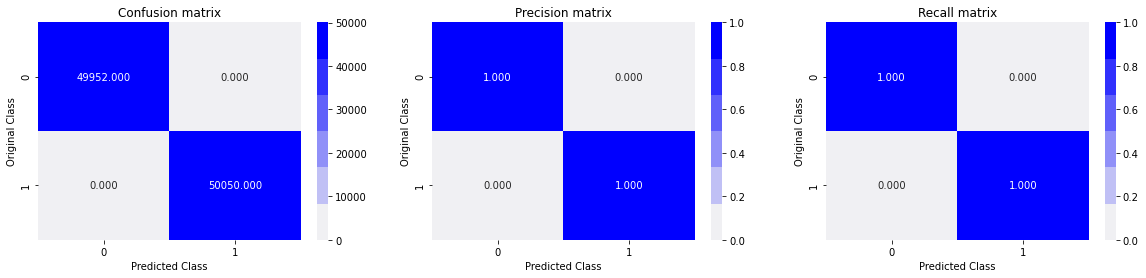

In [ ]:
plot_confusion_matrix(train_y, train_pred)

## Confusion, Precision and Recall Matrix on Test Dataset

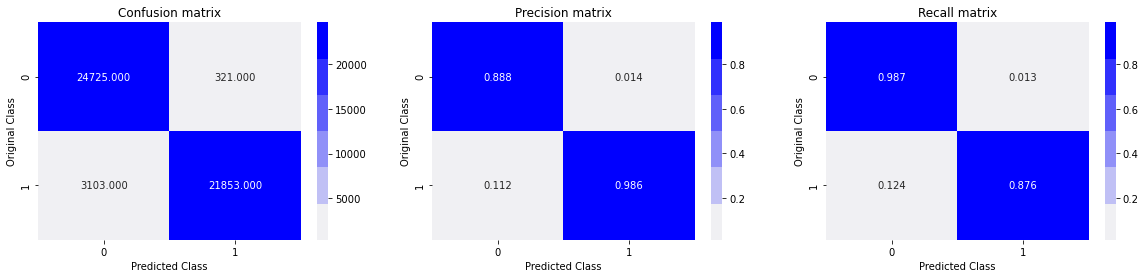

In [ ]:
plot_confusion_matrix(test_y, test_pred)

##**Summary**

In [ ]:
from prettytable import PrettyTable 
summary = PrettyTable()
summary.field_names = ["Model", "n_estimators", "max_depth", "Train f1-Score","Test f1-Score"]

In [ ]:
summary.add_row(['XGBOOST','75','14','1','0.9273'])
print(summary)

+---------+--------------+-----------+----------------+---------------+
|  Model  | n_estimators | max_depth | Train f1-Score | Test f1-Score |
+---------+--------------+-----------+----------------+---------------+
| XGBOOST |      75      |     14    |       1        |     0.9273    |
+---------+--------------+-----------+----------------+---------------+


##**Procedure**

In [ ]:
1. Data was obtained from kaggle, here https://www.kaggle.com/c/FacebookRecruiting
2. The provided data has been loaded as Di-Graph data with 1.86 Mn Nodes and 9.43 Mn Edges
3. Exploratory Data Analysis was performed and data has edges. 
4. A new column(indicator_link) has been added which signifies that the data has an edge (marked as 1)
5. In order to balance out the dataset, more datapoints have been added. 
6. All the new datapoints are randomly selected in such a way that edges do not exist between them.
7. New datapoints are marked as 0 in the (indicator_link) column signifying an absence of edge between the source and destination node
8. Featurization is the most important part of this case study. We extracted various features types of features...
   Similarity measures 
   Ranking Measure
   Various Graph Features
   Various Weight Features
  SVD features using Adjancy matrix. (n_components = 6)
9. XGBoost model was trained and the best hyperparameters were obtained through RandomizedSearchCV 